In [45]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from math import sqrt, exp
from PIL import Image

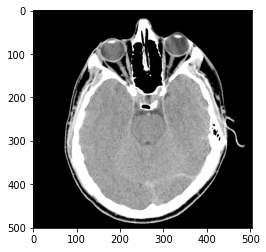

In [37]:
imagem_original=cv2.imread("mri.jpg", 0) # importando a imagem a ser utilizada
plt.imshow(imagem_original, "gray") # Plotando a imagem original

Text(0.5, 1.0, 'Espectro Cetralizado')

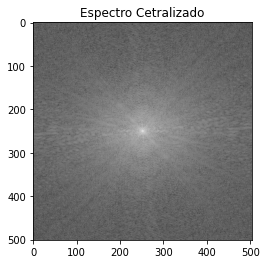

In [61]:
# Plote do Espectro Centralizado da ressonância magnética

original_fft = np.fft.fft2(imagem_original) # Transformação de Fouried em 2-dimensões

center = np.fft.fftshift(original_fft)
plt.imshow(np.log(1+np.abs(center)), "gray")
plt.title("Espectro Cetralizado")

In [82]:
# Valor do coeficiente F(0,0)
alt, lar = center.shape
coef=center[int(lar//2)][int(alt//2)]
coef

(1473218.6483622096+78170.85345648127j)

Como demonstrado, o valor do coeficiente F(0,0) é de (1473218.6483622096+78170.85345648127j),
o qual dita a intensidade média da imagem de ressonância magnética.

In [62]:
# Filtros de domínio da frequência
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

#Filtros ideais
def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base

#Filtros Gaussianos
def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

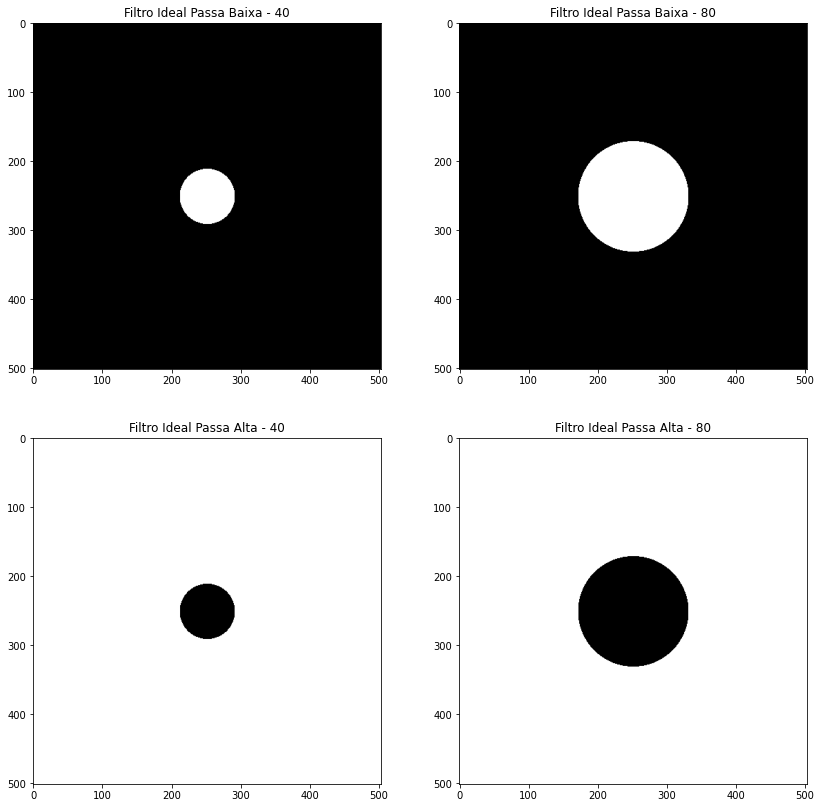

In [88]:
fig, ax = plt.subplots(2,2, figsize=(14,14))

# Aplicando filtragens passa baixa e passa alta com os filtros ideias
PassaBaixaIdeal40 = idealFilterLP(40,imagem_original.shape) # valor de limiar de corte = 40
PassaBaixaIdeal80 = idealFilterLP(80,imagem_original.shape) # valor de limiar de corte = 80

PassaAltaIdeal40 = idealFilterHP(40,imagem_original.shape) # valor de limiar de corte = 40
PassaAltaIdeal80 = idealFilterHP(80,imagem_original.shape) # valor de limiar de corte = 80 


ax[0,0].imshow(PassaBaixaIdeal40, "gray")
ax[0,1].imshow(PassaBaixaIdeal80, "gray")

ax[1,0].imshow(PassaAltaIdeal40, "gray")
ax[1,1].imshow(PassaAltaIdeal80, "gray")

titulos=["Filtro Ideal Passa Baixa - 40",
         "Filtro Ideal Passa Baixa - 80",
         "Filtro Ideal Passa Alta - 40",
         "Filtro Ideal Passa Alta - 80"]

for obj, title in zip(ax.ravel(), titulos):
    obj.set_title(title, loc='center')

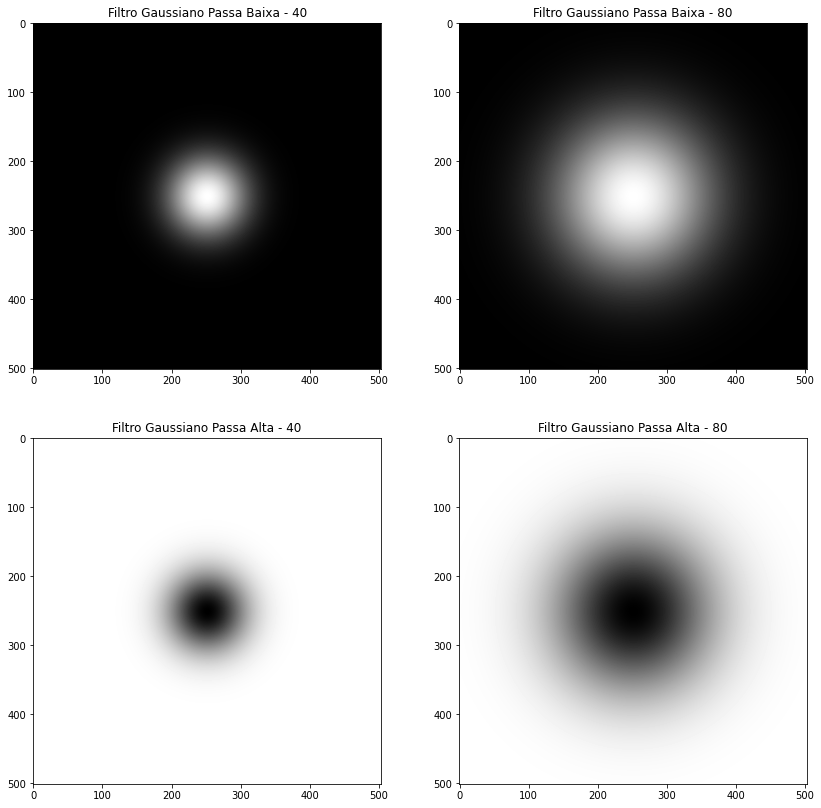

In [86]:
fig, ax = plt.subplots(2,2, figsize=(14,14))

# Aplicando filtragens passa baixa e passa alta com os filtros gaussianos
PassaBaixaGau40 = gaussianLP(40,imagem_original.shape) # valor de limiar de corte = 40
PassaBaixaGau80 = gaussianLP(80,imagem_original.shape) # valor de limiar de corte = 80

PassaAltaGau40 = gaussianHP(40,imagem_original.shape) # valor de limiar de corte = 40
PassaAltaGau80 = gaussianHP(80,imagem_original.shape) # valor de limiar de corte = 80

ax[0,0].imshow(PassaBaixaGau40, "gray")
ax[0,1].imshow(PassaBaixaGau80, "gray")

ax[1,0].imshow(PassaAltaGau40, "gray")
ax[1,1].imshow(PassaAltaGau80, "gray")

titulos=["Filtro Gaussiano Passa Baixa - 40",
         "Filtro Gaussiano Passa Baixa - 80",
         "Filtro Gaussiano Passa Alta - 40",
         "Filtro Gaussiano Passa Alta - 80"]

for obj, title in zip(ax.ravel(), titulos):
    obj.set_title(title, loc='center')


Como demandava o enunciado da questão 1, utilizei os valores de limiar de 40 e 80, para ambos os filtros (filtros de Passa Baixa e de Passa Alta).

Visando buscar a filtragem mais adequada para suavização de imagens dos Filtros Passa Baixas, indica-se o filtro Gaussiano com frequência de corte de 80, pois quanto maior for o valor limiar desses filtros, melhor será a definição da imagem.

Por outro lado, sabendo que a funcionalidade dos Filtros Passa Altas trata de realçar melhor as bordas, recomenda-se o uso do Filtro Passa Alta Ideal, visto que apresentou uma melhor definição de suas bordas. 